### Se importan las librerias necesarias

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


plt.style.use("ggplot")


### Se cargan los archivos a utilizar

In [49]:
# Cargar los datos de los archivos .parquet
df_items = pd.read_parquet('df2_items.parquet')
df_reviews = pd.read_parquet('df_reviews_sentiment.parquet')

### Se verifican los tipos de datos, filas y columnas de los archivos

In [ ]:
df_items.info()
df_reviews.info()

### Se imprimen los datos para ver la primeras y últimas filas del Dataframe

In [ ]:
df_items.head()
df_items.tail()

### Se eliminan las columnas que no aportaran al sistema de recomendación

In [7]:
df_items = df_items.drop(["steam_id","user_url","playtime_2weeks"], axis=1)

### Se verifican los diuplicados de los dos archivos

In [48]:
df_items.drop_duplicates()
df_reviews.drop_duplicates()

,user_id,item_id,posted,recommend,review,sentiment_analysis
0,76561197970982479,1250,"Posted November 5, 2011.",True,simple yet with great replayability in my opin...,2
1,76561197970982479,22200,"Posted July 15, 2011.",True,its unique and worth a playthrough,2
2,76561197970982479,43110,"Posted April 21, 2011.",True,great atmosphere the gunplay can be a bit chun...,2
3,js41637,251610,"Posted June 24, 2014.",True,i know what you think when you see this title ...,2
4,js41637,227300,"Posted September 8, 2013.",True,for a simple its actually not all that simple ...,2
...,...,...,...,...,...,...
57248,76561198312638244,70,Posted July 10.,True,a must have classic from steam definitely wort...,2
57249,76561198312638244,362890,Posted July 8.,True,this game is a perfect remake of the original ...,2
57250,LydiaMorley,273110,Posted July 3.,True,had so much fun plaing this and collecting res...,2
57251,LydiaMorley,730,Posted July 20.,True,d,1


### Se filtran las columnas relevantes para el sistema de recomendación

In [9]:
# Filtrar columnas relevantes para la recomendación
df_items_filtered = df_items[['user_id', 'item_id','item_name','playtime_forever']]
df_reviews_filtered = df_reviews[['user_id', 'item_id', 'sentiment_analysis']]

### Se verifican los filtros 

In [ ]:
df_reviews_filtered

In [ ]:
df_items_filtered

### Se filtran en un DataFrame eliminando las filas donde la columna 'playtime_forever' tenga un valor de 0.



In [12]:
df_items_filtered = df_items_filtered[df_items_filtered['playtime_forever'] != 0]

### Se verifica la eliminación

In [ ]:
df_items_filtered

### Se combina en un solo df las columnas filtradas de cada archivo, las columnas de union son : 'user_id' e 'item_id'

In [14]:
df_combined = pd.merge(df_items_filtered, df_reviews_filtered, on=['user_id', 'item_id'])

### Se verifica el Df nievo producto de la combinación 

In [ ]:
df_combined

### Se grafica la distribución de los diferentes valores de frecuencia de análisis de sentimiento: ccuántas reseñas son positivas, neutrales o negativas.

/var/folders/mz/q_bk1n_55k70r74tttm3ps0c0000gn/T/ipykernel_1944/2671677399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="sentiment_analysis", data=df_combined, palette="coolwarm", order=[0, 1, 2])


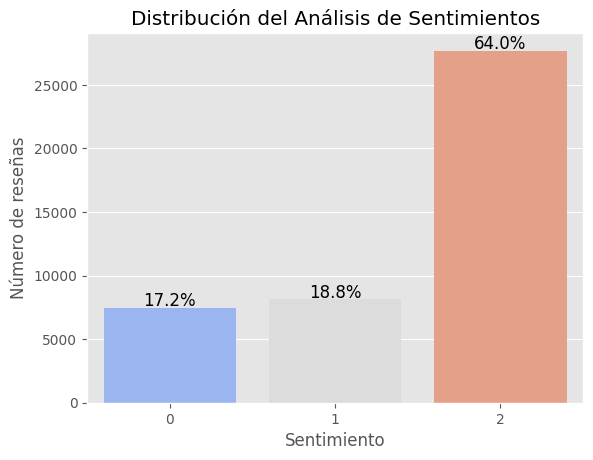

In [47]:
total = len(df_combined['sentiment_analysis'])
ax = sns.countplot(x="sentiment_analysis", data=df_combined, palette="coolwarm", order=[0, 1, 2])
plt.title('Distribución del Análisis de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de reseñas')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')
plt.show()


### Se realiza una prueba para el funcionamiento de DF con un juego en específico "Killing Floor"

In [ ]:
df_combined[df_combined["item_name"]== "Killing Floor"]

####  Reorganizar los datos en forma de tabla dinámica, creando una nueva estructura que muestra el análisis de sentimientos (columna sentiment_analysis) promedio para cada combinación de usuario (user_id) y nombre de ítem (item_name).

In [ ]:
## nota: Si un usuario ha dado múltiples reseñas para un mismo ítem, se tomará el promedio de esos valores de sentiment_analysis (aggfunc=np.mean).
## Cada fila del DataFrame resultante corresponderá a un usuario único, identificado por user_id, Cada columna representará un ítem (nombre de juego, por ejemplo) de la columna item_name y el valor en cada celda de la tabla será el valor de la columna sentiment_analysis

items_pivot = df_combined.pivot_table(index= "user_id", columns = "item_name", values="sentiment_analysis", aggfunc=np.mean)

### Se verifica la tabla dinámica 

In [51]:
items_pivot

item_name,! That Bastard Is Trying To Steal Our Gold !,"10,000,000",100% Orange Juice,12 Labours of Hercules,12 Labours of Hercules II: The Cretan Bull,140,16 Bit Arena,16bit Trader,200% Mixed Juice!,20XX,...,klocki,liteCam Game: 100 FPS Game Capture,oO,planetarian ~the reverie of a little planet~,resident evil 4 / biohazard 4,sZone-Online,the static speaks my name,theBlu,theHunter,theHunter: Primal
user_id,,,,,,,,,,,,,,,,,,,,,
--000--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--ace--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--ionex--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2SV-vuLB-Kg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-Azsael-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zv_odd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zvanik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zynxgameth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Debido a que tiene muchos NaN ( esto de se debe a que todos los usuarios no pueden jugar todos los juegos) y se eliminan

In [52]:
items_pivot.fillna(0, inplace=True)

### Se verifica la tabla dinámica no tenga los NaN

In [ ]:
items_pivot

#### Se crea una matriz dispersa con la tabla dinámica usando csr (permite manejar eficientemente estas grandes cantidades de datos sin desperdiciar memoria y es util con el manejo de valores cero). Se usa para saber cómo los usuarios interactúan con los ítems

In [23]:
df_dispersa = sp.sparse.csr_matrix(items_pivot.values)

#### Se verfica el tamaño de la matriz y sus características

In [24]:
df_dispersa 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 35817 stored elements and shape (19625, 3062)>

### Se traspone la matriz para ver cómo los ítems han sido evaluados por diferentes usuarios, y se verifican sus características

In [25]:
df_dispersa.T

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 35817 stored elements and shape (3062, 19625)>

### Se calcula la similitud entre los usuarios y los juegos, utilizando la similitud del coseno en base a la matriz dispersa df_dispersa.



In [26]:
user_similarity= cosine_similarity(df_dispersa) # que tan parecidos son los usuarios 
item_similarity= cosine_similarity(df_dispersa.T) # que tan parecidos son los juegos

### Se convierten en df

In [27]:
user_similarity_df = pd.DataFrame(user_similarity, index = items_pivot.index, columns = items_pivot.index)

In [ ]:
user_similarity_df.head()

In [29]:
item_similarity_df = pd.DataFrame(item_similarity, index=items_pivot.columns, columns = items_pivot.columns)

In [ ]:
item_similarity_df

### Se prueba la funcion para obtener las similitudes de un ítem específico, en este caso, el ítem "the static speaks my name" y luego ordenarlas en orden descendente.

In [ ]:
item_similarity_df["the static speaks my name"].sort_values(ascending=False)

### Se prueba la funcion para obtener las similitudes de un usuario específico, en este caso, el ítem "zvanik" y luego ordenarlas en orden descendente.

In [32]:
user_similarity_df["zvanik"].sort_values(ascending=False)

user_id
zvanik               1.000000
76561198047956258    0.942809
DeathMage11          0.816497
simplyremi           0.816497
1457184935981        0.816497
                       ...   
76561198086724424    0.000000
76561198086732056    0.000000
76561198086758138    0.000000
76561198086791425    0.000000
zzoptimuszz          0.000000
Name: zvanik, Length: 19625, dtype: float64

### Se prueba la función: creaando una lista de juegos que ha calificado o reseñado el usuario identificado como "zvanik" en el DataFrame df_combined

In [33]:
lista_juegos_user2 = df_combined[df_combined["user_id"]== ("zvanik")].sort_values(by ="item_name")

In [34]:
lista_juegos_user2

,user_id,item_id,item_name,playtime_forever,sentiment_analysis
41250,zvanik,730,Counter-Strike: Global Offensive,15898.0,2
41249,zvanik,200210,Realm of the Mad God,127.0,2
41251,zvanik,304050,Trove,22934.0,2


### Se prueba la función: creaando una lista de juegos que ha calificado o reseñado el usuario identificado como "76561198047956258" en el DataFrame df_combined

In [35]:
lista_juegos_user96 = df_combined[df_combined["user_id"]== ("76561198047956258")].sort_values(by ="item_name")

In [36]:
lista_juegos_user96

,user_id,item_id,item_name,playtime_forever,sentiment_analysis
12606,76561198047956258,730,Counter-Strike: Global Offensive,32420.0,2
12607,76561198047956258,200210,Realm of the Mad God,18526.0,1
12608,76561198047956258,304050,Trove,13207.0,1


### Se combina las dos listas: lista_juegos_user2 y lista_juegos_user96, para comparar similitudes de juegos y que se le podria recomendar al usuario por las calificaciones

In [37]:
resultado_juegos = pd.merge(lista_juegos_user2, lista_juegos_user96, on =["item_id"], how = "left")

In [38]:
resultado_juegos

,user_id_x,item_id,item_name_x,playtime_forever_x,sentiment_analysis_x,user_id_y,item_name_y,playtime_forever_y,sentiment_analysis_y
0,zvanik,730,Counter-Strike: Global Offensive,15898.0,2,76561198047956258,Counter-Strike: Global Offensive,32420.0,2
1,zvanik,200210,Realm of the Mad God,127.0,2,76561198047956258,Realm of the Mad God,18526.0,1
2,zvanik,304050,Trove,22934.0,2,76561198047956258,Trove,13207.0,1


### Se realizan la recomendacion  user_item

In [39]:
def recomendacion_usuario(user_id, n_recommendations=5):
    user_id = str(user_id)
    user_idx = items_pivot.index.get_loc(user_id)  # Obtener el índice del usuario
    similar_users = list(enumerate(user_similarity[user_idx]))
    similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)  # Ordenar por similitud
    similar_users = [items_pivot.index[i] for i, score in similar_users[1:n_recommendations+1]]

    # Recomendamos los juegos jugados por los usuarios similares
    recommended_games = items_pivot.loc[similar_users].mean().sort_values(ascending=False).index[:n_recommendations]
    # Convertir la lista de juegos recomendados en un formato de cadena
    recommended_games_str = ", ".join(recommended_games)
    
    # Crear la respuesta personalizada
    respuesta = f"Para el usuario '{user_id}', los juegos recomendados son: {recommended_games_str}"
    
    return respuesta
    


### Se realiza la prueba de su funcionamiento

In [40]:
respuesta = recomendacion_usuario(user_id='--ace--', n_recommendations=5)
print(respuesta)

Para el usuario '--ace--', los juegos recomendados son: The Binding of Isaac, ! That Bastard Is Trying To Steal Our Gold !, Resident Evil Revelations 2 / Biohazard Revelations 2, Renowned Explorers: International Society, Replica


In [41]:
print(f"Primeros IDs de usuarios: {items_pivot.index[:10]}")
print(f"¿El ID del usuario está en el índice?: {76561198077246154 in items_pivot.index}")

Primeros IDs de usuarios: Index(['--000--', '--ace--', '--ionex--', '-2SV-vuLB-Kg', '-Azsael-',
       '-Beave-', '-GM-Dragon', '-Kenny', '-Mad-', '-PRoSlayeR-'],
      dtype='object', name='user_id')
¿El ID del usuario está en el índice?: False


### Se realiza la recomendacion item_item

In [42]:
def recomendacion_juego(item_id, n_recommendations=5):
    item_idx = items_pivot.columns.get_loc(item_id)  # Obtener el índice del juego
    similar_games = list(enumerate(item_similarity[item_idx]))
    similar_games = sorted(similar_games, key=lambda x: x[1], reverse=True)  # Ordenar por similitud
    similar_games = [items_pivot.columns[i] for i, score in similar_games[1:n_recommendations+1]]
    similar_games_str = ", ".join(similar_games)
    respuesta = f"Ingresando el id de producto '{item_id}', los juegos recomendados similares son: {similar_games_str}"
    return respuesta

### Se prueba el funcionamiento

In [43]:
respuesta = recomendacion_juego(item_id='10,000,000', n_recommendations=5)
print(respuesta)

Ingresando el id de producto '10,000,000', los juegos recomendados similares son: Skulls of the Shogun, The Elder Scrolls V: Skyrim, ! That Bastard Is Trying To Steal Our Gold !, 100% Orange Juice, 12 Labours of Hercules


In [44]:
primeros_ids = items_pivot.columns[:10]
print(primeros_ids)

Index(['! That Bastard Is Trying To Steal Our Gold !', '10,000,000',
       '100% Orange Juice', '12 Labours of Hercules',
       '12 Labours of Hercules II: The Cretan Bull', '140', '16 Bit Arena',
       '16bit Trader', '200% Mixed Juice!', '20XX'],
      dtype='object', name='item_name')


### Se realiza la función y su endpoint para la API de user_item

In [ ]:


# funcion de  recomendacion_user-item:
def recomendacion_usuario(user_id, n_recommendations=5):
    user_id = str(user_id)
    user_idx = items_pivot.index.get_loc(user_id)  # Obtener el índice del usuario
    similar_users = list(enumerate(user_similarity[user_idx]))
    similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)  # Ordenar por similitud
    similar_users = [items_pivot.index[i] for i, score in similar_users[1:n_recommendations+1]]

    # Recomendamos los juegos jugados por los usuarios similares
    recommended_games = items_pivot.loc[similar_users].mean().sort_values(ascending=False).index[:n_recommendations]
    # Convertir la lista de juegos recomendados en un formato de cadena
    recommended_games_str = ", ".join(recommended_games)
    
    # Crear la respuesta personalizada
    respuesta = f"Para el usuario '{user_id}', los juegos recomendados son: {recommended_games_str}"
    
    return respuesta

# Definir un endpoint para obtener recomendaciones de juegos
@app.get("/recomendacion_usuario/")
def get_recomendacion_usuario(user_id: str, n_recommendations: Optional[int] = 5):
    try:
        # Llamar a la función recomendacion_usuario
        recomendaciones = recomendacion_usuario(user_id=user_id, n_recommendations=n_recommendations)
        # Retornar la respuesta en formato JSON
        return {"usuario": user_id, "recomendaciones": recomendaciones}
    except Exception as e:
        # Manejar cualquier error y retornar un mensaje adecuado
        return {"error": str(e)}

# Correr el servidor
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)


### Se realiza la función y su endpoint para la API de item_item

In [ ]:
@app.post("/recomendacion_juego/")
def get_recomendacion_juego(request: RecommendationRequest):
    try:
        # Llamamos a la función de recomendación
        respuesta = recomendacion_juego(request.item_id, request.n_recommendations)
        return {"respuesta": respuesta}
    except KeyError:
        raise HTTPException(status_code=404, detail="El ID del juego no se encuentra en la base de datos.")
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)